# Basic Usage

To create a mesh, we need points and cells, and typically some data defined on these entities.

We import the necessary stuff for this notebook all at once:

In [1]:
from polymesh import PolyData
from polymesh.space import StandardFrame
from polymesh.tri.trimesh import TriMesh
from polymesh.grid import Grid
import numpy as np

Then we create a reference frame, and 3 meshed domains, each havong their own point sources:

In [2]:
frame = StandardFrame(dim=3)

tri = TriMesh(size=(100, 100), shape=(10, 10), frame=frame)
grid2d = Grid(size=(100, 100), shape=(10, 10), eshape='Q4', frame=frame)
grid3d = Grid(size=(100, 100, 100), shape=(8, 6, 2), eshape='H8', frame=frame)

We create the mesh and provide random data for the different blocks:

In [3]:

mesh = PolyData(frame=frame)
mesh['tri', 'T3'] = tri.move(np.array([0., 0., -200]))
mesh['grids', 'Q4'] = grid2d.move(np.array([0., 0., 200]))
mesh['grids', 'H8'] = grid3d

mesh['tri', 'T3'].pointdata['values'] = np.full(tri.coords().shape[0], 5.)
mesh['grids', 'Q4'].pointdata['values'] = np.full(grid2d.coords().shape[0], 10.)
mesh['grids', 'H8'].pointdata['values'] = np.full(grid3d.coords().shape[0], -5.)

We can plot our mesh using PyVista:

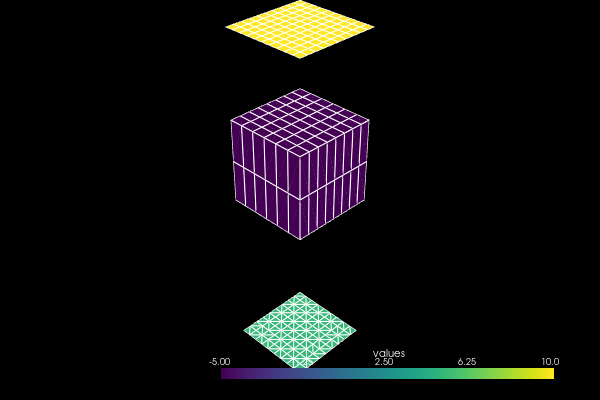

In [4]:
import pyvista as pv
from pyvista import themes

my_theme = themes.DarkTheme()
my_theme.color = 'red'
my_theme.lighting = False
my_theme.show_edges = True
my_theme.axes.box = True

pv.set_plot_theme(my_theme)

mesh.pvplot(notebook=True, window_size = (600, 400), theme=my_theme, 
            jupyter_backend='static', scalars='values')

If we want, we can print only parts of the structure at once:

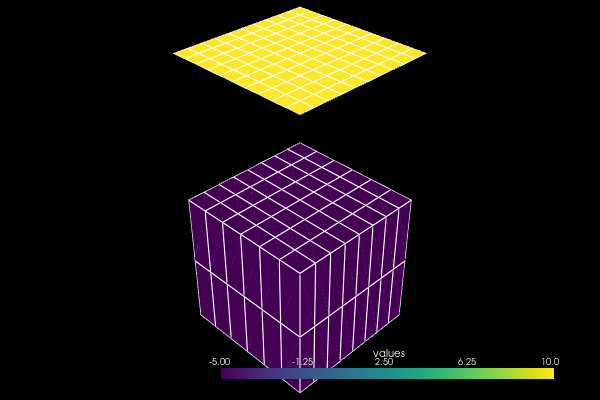

In [5]:
mesh['grids'].pvplot(notebook=True, window_size = (600, 400), theme=my_theme, 
            jupyter_backend='static', scalars='values')

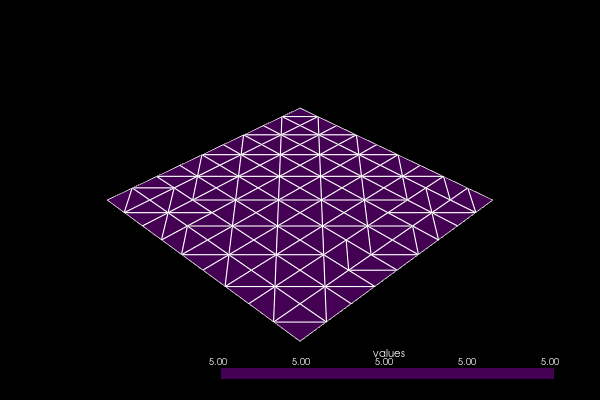

In [6]:
mesh['tri'].pvplot(notebook=True, window_size = (600, 400), theme=my_theme, 
            jupyter_backend='static', scalars='values')